In [19]:
import random

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib widget


def find_closest_match(x, dataset, loss_fn):
    """Searches the `dataset` for the sample that has the lowest
    error as compared with `loss_fn`.
    """
    # TODO: Implement a search based on the lowest loss as given by `loss_fn`
    return dataset[0]


def plot_hands3d(ax, points, color, linewidth='3'):
    # Add bone connections
    bones = [(13, 11),
             (13, 12),
             (13, 1),
             (0, 1),
             (13, 3),
             (2, 3),
             (13, 5),
             (4, 5),
             (13, 7),
             (6, 7),
             (13, 10),
             (9, 10),
             (8, 9)]

    for connection in bones:
        coord1 = points[connection[0]]
        coord2 = points[connection[1]]
        coords = np.stack([coord1, coord2])
        ax.plot(coords[:, 0], coords[:, 1], coords[:, 2], c=color, linewidth=linewidth)

# NYU Hand Pose Dataset

The [NYU Hand Pose Dataset](https://jonathantompson.github.io/NYU_Hand_Pose_Dataset.htm) was published in 2014. It provides 72,757 training frames and 8,252 test frames captured with RGB-D cameras (Kinect 1). Keypoint annotations are provided for each frame.

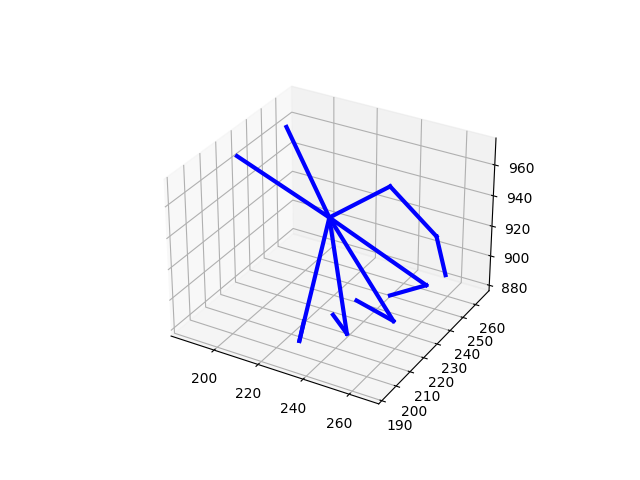

In [18]:
# Load dataset
testing_mat = sio.loadmat("data/test_joint_data.mat")
training_mat = sio.loadmat("data/train_joint_data.mat")
test_dataset = testing_mat['joint_uvd'][0]
train_dataset = training_mat['joint_uvd'][0]

# Show a sample
eval_joints = [0, 3, 6, 9, 12, 15, 18, 21, 24, 25, 27, 30, 31, 32]
sample = train_dataset[10000][eval_joints]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_hands3d(ax, sample, 'b')

# Finding the Closest Match

In this notebook, the goal is to complete the function `find_closest_match` to retrieve samples in the dataset that most closely match an input sample based on either L1 or L2 loss.

In [ ]:
# Search for the closest match
input_idx = 0
input_sample = test_dataset[input_idx]
match = find_closest_match(input_sample)

# Visualize Results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_hands3d(ax, input_sample, 'b')
plot_hands3d(ax, match, 'r')